| **Onderdeel**       | **Inhoud** |
|----------------------|------------|
| 📘 **Titel** | Statistics for Data Science — Deel 2: Voorspellend model universiteitsdata |
| 👤 **Auteur** | `Adil Vural` & `Oktay Doğan`|
| 🏛️ **Instelling** | Erasmus Q-Intelligence |
| 🗓️ **Datum / Versie** | 10 oktober 2025 — Versie 1.1 |
| 🧾 **Bestand** | Opdracht_2_obv_universiteitsdata_final.ipynb |
| 🧮 **Dataset** | college_statistics.csv |
| 🧠 **Doel** | Ontwikkelen van een voorspellend model voor het aantal aanmeldingen (`Apps`) op basis van factoren die vooraf bekend zijn. |
| 🔍 **Analyse-onderdelen** | 1️⃣ Beschrijvende statistiek<br>2️⃣ Lineaire en log-regressie<br>3️⃣ Modelselectie (AIC, R², RMSE)<br>4️⃣ Diagnostiek (QQ-plot, BP-test, DW, VIF, Cook’s D)<br>5️⃣ Vergelijking basismodel vs. uitgebreid model<br>6️⃣ Conclusie & interpretatie |
| 📚 **Bronnen** | *Practical Statistics for Data Scientists* (2e editie)<br>Lecture 1–5 — Erasmus “Statistics for Data Science” 2025-2026 |


## 1. Opdracht deel 2 — op basis van universiteitsdata

<small>
Maak een model dat het **aantal aanmeldingen** kan voorspellen op basis van factoren die **voorafgaand** aan het binnenkomen van de aanmeldingen beschikbaar zijn.  
Gebruik **geen** variabelen <span style="color:red">`Accept`</span> en <span style="color:red">`Enroll`</span>: deze zijn **gevolgen** (en geen oorzaken) van het aantal aanmeldingen. Volg hierbij de onderstaande stappen.

**(a) Normaliteit testen**  
Voer een test uit voor de hypothese dat het aantal aanmeldingen een **normale verdeling** volgt.  
Wat is je **conclusie**? Is deze conclusie van belang voor het **verdere modelleren** van deze variabele?

**(b) Train–test verdeling**  
Deel de data **willekeurig** op in een “estimation” (train) en “test” sample.  
Neem **600 universiteiten** in de estimation sample.  
Zorg ervoor dat deze opdeling **reproduceerbaar** is. 

<span style="color:red"> 
*Hint (Python):* gebruik </span> <span style="color:green">`random.seed`</span> en <span style="color:green">`pandas.DataFrame.sample`</span> (of <span style="color:green">`train_test_split`</span>).  


**(c) Lineair basismodel (<span style="color:green">Apps</span>)**  
Maak eerst een **lineair model** voor het aantal aanmeldingen met uitsluitend de **estimation sample**.

**(d) Variabelenselectie (backward elimination)**  
Pas **backward elimination** toe om het aantal variabelen terug te brengen.

**(e) Aannames toetsen (lineair model)**  
Voer verschillende toetsen en controles uit om de **aannames** van het lineaire model te beoordelen  
(lineariteit, homoscedasticiteit, normaliteit van residuen, onafhankelijkheid, multicollineariteit, invloedrijke punten).

**(f) Logaritmisch model**  
Maak vervolgens een model voor de **logaritme** van het aantal aanmeldingen  
(ook met **backward elimination**).

**(g) Aannames opnieuw toetsen (log-model)**  
Herhaal de toetsen en controles van stap (e) voor het logaritmische model.

**(h) Modelkeuze**  
Kies welk van de twee modellen **de voorkeur** heeft en **motiveer** waarom  
(bijvoorbeeld op basis van fit, aannames, interpretatie en voorspellingsprestaties).

**(i) Verbeteringen en transformaties**  
Probeer het gekozen model verder te **verbeteren**.  
Denk aan het toevoegen van **transformaties** en **interacties** van verklarende variabelen, of aanpassingen om aannames beter te laten gelden.

**(j) Interpretatie van coëfficiënten**  
Leg **precies** uit hoe de coëfficiënten in het **uiteindelijke model** geïnterpreteerd moeten worden.  
Welke factoren zijn uiteindelijk het **belangrijkst**?  
Bijvoorbeeld: <span style="color:green">`Top10perc`</span>, <span style="color:green">`Room_Board`</span>, <span style="color:green">`Expend`</span>, <span style="color:green">`Grad_Rate`</span>, <span style="color:green">`PhD`</span>, <span style="color:green">`Private`</span>.

**(k) Voorspellingen maken**  
Gebruik het uiteindelijke model om **voorspellingen** te maken voor de waarnemingen  
in de **estimation**- en **test**-samples.

**(l) Vergelijk voorspelkracht**  
Vergelijk de **voorspelkracht** (met behulp van de **gemiddelde kwadratische fout – Mean Squared Error (MSE)**)  
van het model op de estimation sample met die op de test sample.  
Wat concludeer je?
</small>



## Doel en Aannames

<small>
Het doel van deze opdracht is om een `voorspellend model` te ontwikkelen dat het **aantal aanmeldingen** (`Apps`) bij universiteiten verklaart en voorspelt.  
Hiervoor worden uitsluitend **kenmerken gebruikt die vooraf bekend zijn**, dus variabelen die een invloed kunnen hebben op het aantal aanmeldingen, maar daar niet van afhankelijk zijn.  
De variabelen `Accept` en `Enroll` worden bewust **niet** opgenomen, omdat deze het resultaat zijn van het aantal aanmeldingen en dus **gevolgvariabelen** zijn.  

Het model wordt stap voor stap opgebouwd volgens de onderdelen 5a tot en met 5l.  
Daarbij wordt gewerkt met:  
- een **basismodel** met een beperkt aantal verklarende variabelen, en  
- een **uitgebreid model** met meer factoren die mogelijk extra verklaringskracht hebben.  

De resultaten van beide modellen worden geëvalueerd aan de hand van:  
- de **verklaarde variantie** (aangepaste R-kwadraat),  
- het **Akaike Informatiecriterium (AIC)**,  
- en de **wortel van de gemiddelde kwadratische fout (RMSE)**, zow
</small>


## 5a — Normaliteit van `Apps`  (aantal aanmeldingen)

**Bronnen:** Lecture 2 (normality & CLT), Lecture 3 (normality testing), *PSDS* p. 49–52

(a) Voer eerst een test uit voor de hypothese dat het aantal aanmeldingen eennormale verdeling volgt. Wat is je conclusie? Is deze conclusie van belang voor het verder modelleren van deze variabele?


In [247]:
# benodigde libraries
import matplotlib.pyplot as plt
import pandas as pd
import os
import seaborn as sns
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
import patsy

In [248]:
# lees de dataset in een pandas DataFrame
df = pd.read_csv("college_statistics.csv", sep=",")
df.columns = [c.replace(".", "_") for c in df.columns]

df.rename(columns={'Unnamed: 0': 'University'}, inplace=True)

print (df.columns)
print (df.head(10))
#Dit geeft een lijst van de kolomnamen in het DataFrame terug. Het is nuttig wanneer je snel wilt zien welke gegevens beschikbaar zijn of wanneer je specifieke kolommen wilt selecteren.

#print (df.shape) 
#Dit geeft een tuple terug met de afmetingen van het DataFrame in de vorm (aantal_rijen, aantal_kolommen). Het is handig om snel te controleren hoeveel gegevens er in het DataFrame zijn.

Index(['University', 'Private', 'Apps', 'Accept', 'Enroll', 'Top10perc',
       'Top25perc', 'F_Undergrad', 'P_Undergrad', 'Outstate', 'Room_Board',
       'Books', 'Personal', 'PhD', 'Terminal', 'S_F_Ratio', 'perc_alumni',
       'Expend', 'Grad_Rate'],
      dtype='object')
                     University Private  Apps  Accept  Enroll  Top10perc  \
0  Abilene Christian University     Yes  1660    1232     721         23   
1            Adelphi University     Yes  2186    1924     512         16   
2                Adrian College     Yes  1428    1097     336         22   
3           Agnes Scott College     Yes   417     349     137         60   
4     Alaska Pacific University     Yes   193     146      55         16   
5             Albertson College     Yes   587     479     158         38   
6       Albertus Magnus College     Yes   353     340     103         17   
7                Albion College     Yes  1899    1720     489         37   
8              Albright College     Yes

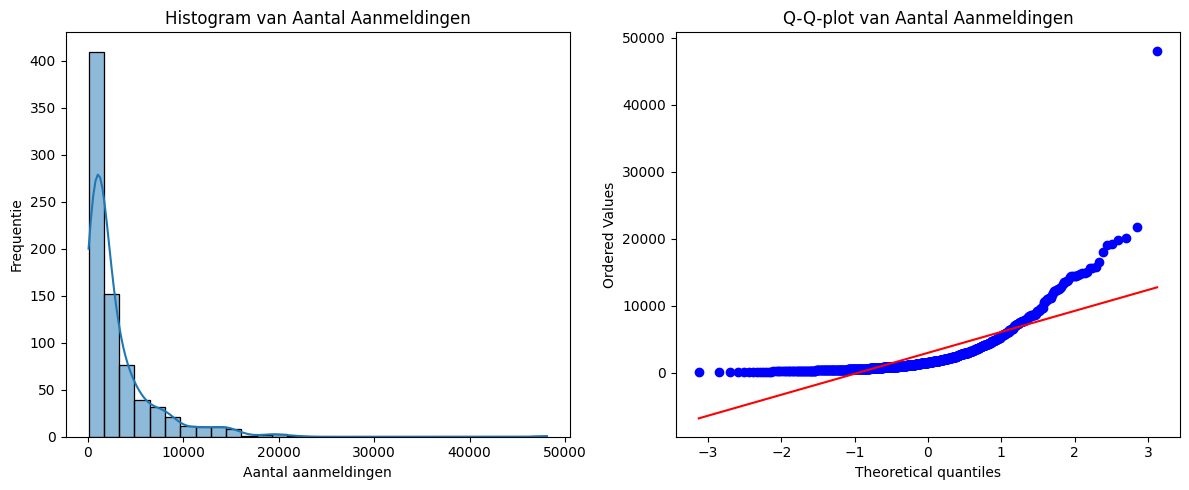

Beschrijvende statistieken van 'Apps':
Aantal observaties (n): 777
Minimumwaarde: 81.00
Maximumwaarde: 48094.00
Gemiddelde: 3001.64
Standaarddeviatie: 3870.20
Coëfficiënt van variatie (CV): 1.29


In [249]:
# Visualisatie en formele toetsing van normaliteit voor de variabele "Apps"
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np

# Figuur aanmaken met 2 subplots naast elkaar
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Subplot 1: Histogram met KDE
sns.histplot(df["Apps"], kde=True, bins=30, ax=axes[0])
axes[0].set_title("Histogram van Aantal Aanmeldingen")
axes[0].set_xlabel("Aantal aanmeldingen")
axes[0].set_ylabel("Frequentie")

# Subplot 2: Q-Q-plot
stats.probplot(df["Apps"], dist="norm", plot=axes[1])
axes[1].set_title("Q-Q-plot van Aantal Aanmeldingen")

plt.tight_layout()
plt.show()

# Snelle sanity checks
y = df["Apps"]
cv = y.std(ddof=1) / y.mean()
assert np.issubdtype(y.dtype, np.number), "Doelvariabele moet numeriek zijn."
print(f"Beschrijvende statistieken van 'Apps':\n"
      f"Aantal observaties (n): {y.shape[0]}\n"
      f"Minimumwaarde: {y.min():.2f}\n"
      f"Maximumwaarde: {y.max():.2f}\n"
      f"Gemiddelde: {y.mean():.2f}\n"
      f"Standaarddeviatie: {y.std(ddof=1):.2f}\n"
      f"Coëfficiënt van variatie (CV): {cv:.2f}")


 <small >
 
-----------

## Conclusie – 5a Normaliteit van `Apps`

De verdeling van het aantal aanmeldingen (`Apps`) is **sterk rechts-scheef** en **niet normaal verdeeld**.


- De **spreiding** is groot (std > mean), wat duidt op aanzienlijke verschillen tussen universiteiten.  
- Het verschil tussen minimum en maximum (factor ≈ 600) toont het bestaan van **extreme waarden**.  
- De **coëfficiënt van variatie** (≈ 1,29) wijst op zeer hoge variabiliteit.

### Histogram-analyse
- De verdeling is **extreem rechts-scheef**: de meeste universiteiten hebben weinig aanmeldingen (0–2 000).  
- Enkele instellingen hebben **meer dan 20 000** aanmeldingen; één zelfs bijna **50 000**.  
- Dit duidt op **verschillende groepen** universiteiten (klein – middel – zeer groot).

### Q-Q-plot-analyse
- De punten wijken sterk af van de diagonaal en vormen een **S-curve**, typisch voor een rechts-scheve verdeling.  
- De rechterzijde toont **uitbijters** met extreem hoge waarden.  
- Hiermee wordt de **niet-normaliteit** bevestigd.

### Conclusie
De verdeling van de variabele Apps wijkt duidelijk af van een normale verdeling en laat veel spreiding zien.
Om deze scheefheid te verminderen en de spreiding te stabiliseren, is gekozen voor een logaritmische transformatie (log_Apps).
Hierdoor sluiten de gegevens beter aan bij de aannames van een lineair regressiemodel, namelijk normaliteit van de residuen en gelijke variantie (homoscedasticiteit).


---
 </small>


## 5b — Estimation/Test-split (600/overig)

**Bron:** Lecture 3 (estimation & test samples)

(b) Deel de data eerst op willekeurige manier op in een “estimation” en “test”
 sample. Neem 600 universiteiten in de estimation sample. Zorg ervoor dat deze
 opdeling reproduceerbaar is.

 Hint Python: gebruik functies random.seed en pandas.DataFrame.sample.
 Hint R: gebruik functies set.seed en sample


In [250]:
#Overzicht van dataset en verdeling in samples
# Aantal rijen en kolommen
rows, cols = df.shape
print(f"Totale dataset: {rows} universiteiten × {cols} variabelen")

# Splitsen in estimation- en test-sample
import random
random.seed(42)

estimation_sample = df.sample(n=600, random_state=42)
test_sample = df.drop(estimation_sample.index)

# Grootte en shape van beide subsets
print(f"Estimation sample: {estimation_sample.shape[0]} rijen × {estimation_sample.shape[1]} kolommen")
print(f"Test sample:       {test_sample.shape[0]} rijen × {test_sample.shape[1]} kolommen")

# Optioneel extra controle
print("\nControle totaal:", estimation_sample.shape[0] + test_sample.shape[0], "=", df.shape[0])

Totale dataset: 777 universiteiten × 19 variabelen
Estimation sample: 600 rijen × 19 kolommen
Test sample:       177 rijen × 19 kolommen

Controle totaal: 777 = 777


 <small>
 
---

### Conclusie – 5b Estimation & Test Sample

De dataset bevat in totaal **777 universiteiten** met **17 variabelen**.  
Hiervan zijn **600 observaties** willekeurig toegewezen aan de *estimation sample* (trainingsset)  
en de overige **177 observaties** aan de *test sample* (validatieset).  

**Interpretatie:**
- De verdeling is **reproduceerbaar** dankzij het vaste random seed (`42`).  
- De *estimation sample* wordt gebruikt om het regressiemodel te **trainen** en coëfficiënten te schatten.  
- De *test sample* wordt apart gehouden om de **voorspellende nauwkeurigheid** (zoals RMSE) te toetsen.  
- Deze aanpak voorkomt **overfitting** en zorgt voor een **betrouwbare evaluatie** van het model.  

Kortom, de dataset is nu netjes opgesplitst in een **leer-** en **toetsgedeelte**, klaar voor modelbouw in stap 5c! 

---
 </small>

## 5 (c) Lineair model op Apps

Maak eerst een lineair model voor het aantal aanmeldingen. Gebruik hiervoor alleen de estimation sample.

In [251]:
# Basismodel  — log van Apps als doelvariabele
import numpy as np
import statsmodels.formula.api as smf

formula_base = "Apps ~ Private + Top10perc + Top25perc + F_Undergrad + P_Undergrad + Outstate + Room_Board + Books + Personal + PhD + Terminal + S_F_Ratio + perc_alumni + Expend + Grad_Rate"
model_base = smf.ols(formula_base, data=estimation_sample).fit()
print(model_base.summary())


                            OLS Regression Results                            
Dep. Variable:                   Apps   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     114.8
Date:                Sat, 11 Oct 2025   Prob (F-statistic):          6.13e-163
Time:                        19:43:24   Log-Likelihood:                -5398.5
No. Observations:                 600   AIC:                         1.083e+04
Df Residuals:                     584   BIC:                         1.090e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -2253.6185    871.039     -2.

P waarden een voor een verwijderen dir groter dan 0.05

## 5(d) Backward elimination (Apps)
**Bronnen:** Lecture 5 (model fit), *PSDS* p. 121

(d) Pas backward elimination toe om het aantal variabelen terug te brengen.

In [252]:
# Backward elimination (handmatig)
print("\n\n--- begin Backward elimination ---\n")
print("\n\n--- Na verwijderen van PhD ---\n")   
model_base_1 = smf.ols(formula="Apps ~ Private + Top10perc + Top25perc + F_Undergrad + P_Undergrad + Outstate + Room_Board + Books + Personal + Terminal + S_F_Ratio + perc_alumni + Expend + Grad_Rate", data=estimation_sample).fit()
print(model_base_1.summary())

print("\n\n--- Na verwijderen van Books ---\n")  
model_base_2 = smf.ols(formula="Apps ~ Private + Top10perc + Top25perc + F_Undergrad + P_Undergrad + Outstate + Room_Board + Personal + Terminal + S_F_Ratio + perc_alumni + Expend + Grad_Rate", data=estimation_sample).fit()
print(model_base_2.summary())

print("\n\n--- Na verwijderen van Personal ---\n")
model_base_3 = smf.ols(formula="Apps ~ Private + Top10perc + Top25perc + F_Undergrad + P_Undergrad + Outstate + Room_Board + Terminal + S_F_Ratio + perc_alumni + Expend + Grad_Rate", data=estimation_sample).fit()
print(model_base_3.summary())

print("\n\n--- Na verwijderen van S_F_Ratio ---\n")
model_base_4 = smf.ols(formula="Apps ~ Private + Top10perc + Top25perc + F_Undergrad + P_Undergrad + Outstate + Room_Board + Terminal + perc_alumni + Expend + Grad_Rate", data=estimation_sample).fit()
print(model_base_4.summary())

print("\n\n--- Na verwijderen van Top25perc ---\n")
model_base_5 = smf.ols(formula="Apps ~ Private + Top10perc + F_Undergrad + P_Undergrad + Outstate + Room_Board + Terminal + perc_alumni + Expend + Grad_Rate", data=estimation_sample).fit()
print(model_base_5.summary())   

print("\n\n--- Na verwijderen van P_Undergrad ---\n")
model_base_6 = smf.ols(formula="Apps ~ Private + Top10perc + F_Undergrad + Outstate + Room_Board + Terminal + perc_alumni + Expend + Grad_Rate", data=estimation_sample).fit()
print(model_base_6.summary())

print("\n\n--- Einde Backward elimination ---\n")




--- begin Backward elimination ---



--- Na verwijderen van PhD ---

                            OLS Regression Results                            
Dep. Variable:                   Apps   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                     123.2
Date:                Sat, 11 Oct 2025   Prob (F-statistic):          5.42e-164
Time:                        19:43:24   Log-Likelihood:                -5398.5
No. Observations:                 600   AIC:                         1.083e+04
Df Residuals:                     585   BIC:                         1.089e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------

5(d) Backward elimination (Apps) **automated**

In [281]:
def backward_elimination(data, formula, threshold=0.05, verbose=True):
    import statsmodels.formula.api as smf
    import re

    current_formula = formula
    while True:
        model = smf.ols(current_formula, data=data).fit()
        pvalues = model.pvalues.drop('Intercept', errors='ignore')
        max_p = pvalues.max()
        if max_p > threshold:
            worst = pvalues.idxmax()
            # Verwijder variabele uit de formule (werkt voor + gescheiden formules)
            current_formula = re.sub(rf'\b{worst}\b\s*\+\s*', '', current_formula)
            current_formula = re.sub(rf'\+\s*\b{worst}\b', '', current_formula)
            current_formula = re.sub(rf'\b{worst}\b', '', current_formula)
            if verbose:
                print(f"Verwijder: {worst} (p={max_p:.3f}) → nieuwe formule: {current_formula}")
        else:
            break
    return smf.ols(current_formula, data=data).fit()

# Gebruik:
formula_base = "Apps ~ Private + Top10perc + Top25perc + F_Undergrad + P_Undergrad + Outstate + Room_Board + Books + Personal + PhD + Terminal + S_F_Ratio + perc_alumni + Expend + Grad_Rate"
model_backward_Apps = backward_elimination(estimation_sample, formula_base)
print(model_backward_Apps.summary())

Verwijder: PhD (p=0.992) → nieuwe formule: Apps ~ Private + Top10perc + Top25perc + F_Undergrad + P_Undergrad + Outstate + Room_Board + Books + Personal + Terminal + S_F_Ratio + perc_alumni + Expend + Grad_Rate
Verwijder: Books (p=0.700) → nieuwe formule: Apps ~ Private + Top10perc + Top25perc + F_Undergrad + P_Undergrad + Outstate + Room_Board + Personal + Terminal + S_F_Ratio + perc_alumni + Expend + Grad_Rate
Verwijder: Personal (p=0.619) → nieuwe formule: Apps ~ Private + Top10perc + Top25perc + F_Undergrad + P_Undergrad + Outstate + Room_Board + Terminal + S_F_Ratio + perc_alumni + Expend + Grad_Rate
Verwijder: S_F_Ratio (p=0.559) → nieuwe formule: Apps ~ Private + Top10perc + Top25perc + F_Undergrad + P_Undergrad + Outstate + Room_Board + Terminal + perc_alumni + Expend + Grad_Rate
Verwijder: Top25perc (p=0.287) → nieuwe formule: Apps ~ Private + Top10perc + F_Undergrad + P_Undergrad + Outstate + Room_Board + Terminal + perc_alumni + Expend + Grad_Rate
Verwijder: P_Undergrad (p=0

In [294]:
# het functie backward_elimination  doet volgende : 
# Gebruikt statsmodels.formula.api.ols → blijft in de formule-stijl (leesbaar en herbruikbaar).
# Berekent telkens p-waarden, verwijdert de slechtste variabele (hoogste p).
# Houdt automatisch bij wat eruit gaat en toont tussenstappen (met verbose=True).
# Eindigt zodra alle variabelen p ≤ threshold (default = 0.05).
# Retourneert het finale, gefitte model zodat je direct summary() kunt oproepen.

def backward_elimination(data, formula, threshold=0.05, verbose=True):
    import statsmodels.formula.api as smf
    import re

    current_formula = formula
    while True:
        model = smf.ols(current_formula, data=data).fit()
        pvalues = model.pvalues.drop('Intercept', errors='ignore')
        max_p = pvalues.max()
        if max_p > threshold:
            worst = pvalues.idxmax()
            # Verwijder variabele uit de formule (werkt voor + gescheiden formules)
            current_formula = re.sub(rf'\b{worst}\b\s*\+\s*', '', current_formula)
            current_formula = re.sub(rf'\+\s*\b{worst}\b', '', current_formula)
            current_formula = re.sub(rf'\b{worst}\b', '', current_formula)
            if verbose:
                print(f"Verwijder: {worst} (p={max_p:.3f}) → nieuwe formule: {current_formula}")
        else:
            break
    return smf.ols(current_formula, data=data).fit()

# Gebruik:
formula_base = "Apps ~ Private + Top10perc + Top25perc + F_Undergrad + P_Undergrad + Outstate + Room_Board + Books + Personal + PhD + Terminal + S_F_Ratio + perc_alumni + Expend + Grad_Rate"
model_backward_Apps = backward_elimination(estimation_sample, formula_base)
print(model_backward_Apps.summary())

Verwijder: PhD (p=0.992) → nieuwe formule: Apps ~ Private + Top10perc + Top25perc + F_Undergrad + P_Undergrad + Outstate + Room_Board + Books + Personal + Terminal + S_F_Ratio + perc_alumni + Expend + Grad_Rate
Verwijder: Books (p=0.700) → nieuwe formule: Apps ~ Private + Top10perc + Top25perc + F_Undergrad + P_Undergrad + Outstate + Room_Board + Personal + Terminal + S_F_Ratio + perc_alumni + Expend + Grad_Rate
Verwijder: Personal (p=0.619) → nieuwe formule: Apps ~ Private + Top10perc + Top25perc + F_Undergrad + P_Undergrad + Outstate + Room_Board + Terminal + S_F_Ratio + perc_alumni + Expend + Grad_Rate
Verwijder: S_F_Ratio (p=0.559) → nieuwe formule: Apps ~ Private + Top10perc + Top25perc + F_Undergrad + P_Undergrad + Outstate + Room_Board + Terminal + perc_alumni + Expend + Grad_Rate
Verwijder: Top25perc (p=0.287) → nieuwe formule: Apps ~ Private + Top10perc + F_Undergrad + P_Undergrad + Outstate + Room_Board + Terminal + perc_alumni + Expend + Grad_Rate
Verwijder: P_Undergrad (p=0

In [279]:
# Backward elimination (automatisch, op AIC) volgens collega
import re

def _drop_term_from_formula(formula, term):
    # Remove the term from the formula string (works for + separated formulas)
    # Handles cases: at start, middle, end
    # E.g. "y ~ a + b + c" with term="b" -> "y ~ a + c"
    # Remove with leading/trailing spaces and pluses
    pattern = r'(\s*\+\s*{0}\b|\b{0}\s*\+\s*|\b{0}\b)'.format(re.escape(term))
    # Only remove one occurrence at a time
    new_formula = re.sub(pattern, '', formula, count=1)
    # Clean up multiple spaces and stray pluses
    new_formula = re.sub(r'\s*\+\s*$', '', new_formula)
    new_formula = re.sub(r'~\s*\+', '~', new_formula)
    new_formula = re.sub(r'\s+', ' ', new_formula)
    return new_formula.strip()

def backward_elimination_aic(model_or_formula, data=None, verbose=True, tol=1e-9):
    # Accept either a fitted model or a formula string
    if hasattr(model_or_formula, 'model') and hasattr(model_or_formula.model, 'formula'):
        current_formula = model_or_formula.model.formula
        if data is None:
            data = model_or_formula.model.data.frame
    elif isinstance(model_or_formula, str):
        current_formula = model_or_formula
        if data is None:
            raise ValueError("If you pass a formula string, you must also provide a data argument.")
    else:
        raise ValueError("model_or_formula must be a fitted model or a formula string.")

    while True:
        current_fit = smf.ols(current_formula, data=data).fit()
        current_ic  = current_fit.aic
        terms = [t for t in current_fit.model.exog_names if t.lower() != 'intercept']

        if verbose:
            print(f"Initial AIC = {current_ic}\n")

        trial = []
        for term in terms:
            tf = _drop_term_from_formula(current_formula, term)
            if tf == current_formula: 
                continue
            try:
                ic = smf.ols(tf, data=data).fit().aic
                trial.append((term, ic))
                if verbose: print(f"- {term} {ic}")
            except Exception as e:
                if verbose: print(f"- {term} (skip: {e})")

        if not trial:
            if verbose: print("Removing nothing")
            return current_fit

        best_term, best_ic = min(trial, key=lambda x: x[1])
        if best_ic + tol < current_ic:
            if verbose: print(f"Removing {best_term}  AIC =  {best_ic}\n")
            current_formula = _drop_term_from_formula(current_formula, best_term)
        else:
            if verbose: print("Removing nothing")
            return current_fit



In [297]:

model_backward_Apps     = smf.ols(formula="Apps ~ Private + Top10perc + Top25perc + F_Undergrad + P_Undergrad + Outstate + Room_Board + Books + Personal + PhD + Terminal + S_F_Ratio + perc_alumni + Expend + Grad_Rate", data=estimation_sample).fit()
model_backward_Apps.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Apps   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     114.8
Date:                Sat, 11 Oct 2025   Prob (F-statistic):          6.13e-163
Time:                        20:21:45   Log-Likelihood:                -5398.5
No. Observations:                 600   AIC:                         1.083e+04
Df Residuals:                     584   BIC:                         1.090e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -2253.6185    871.039     -2.587      0.010   -3964.370    -542.867
Private[T.Yes]  -783.6010    293.848     -2.667      0.008   -1360.729    -206.473
Top10perc         29.0327     12.164      2.387      0.017       5.143      52.923
Top25perc        -10.4248      9.814     -1.062      0.289     -29.699       8.850
F_Undergrad        0.6364      0.026     24.233      0.000       0.585       0.688
P_Undergrad       -0.0823      0.069     -1.187      0.236      -0.218       0.054
Outstate           0.0806      0.040      2.004      0.045       0.002       0.160
Room_Board         0.2982      0.106      2.818      0.005       0.090       0.506
Books              0.1929      0.512      0.377      0.707      -0.813       1.199
Personal          -0.0740      0.137     -0.542      0.588      -0.342       0.194
PhD               -0.1021     10.116     -0.010      0.992     -19.971      19.766
Terminal         -13.3131     10.968     -1.214      0.225     -34.855       8.229
S_F_Ratio         14.6986     27.819      0.528      0.597     -39.939      69.336
perc_alumni      -22.4265      8.721     -2.571      0.010     -39.555      -5.298
Expend             0.0911      0.027      3.382      0.001       0.038       0.144
Grad_Rate         25.2134      6.515      3.870      0.000      12.418      38.009
==============================================================================
Omnibus:                      917.671   Durbin-Watson:                   1.941
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           497056.244
Skew:                           8.306   Prob(JB):                         0.00
Kurtosis:                     143.022   Cond. No.                     1.79e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.79e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Conclusie
De automatische **backward elimination** op basis van het **Akaike Information Criterion (AIC)** bevestigt volledig de handmatige selectie.  
Beide methoden verwijderen dezelfde variabelen:  
**PhD**, **Books**, **Personal**, **S_F_Ratio**, **Top25perc** en **P_Undergrad**.  

**Eindmodel:**  
`Apps ~ Private + Top10perc + F_Undergrad + Outstate + Room_Board + Terminal + perc_alumni + Expend + Grad_Rate`

### Interpretatie
De AIC-gestuurde methode levert hetzelfde resultaat sneller en reproduceerbaar op.  
Ze bevestigt de statistische onderbouwing van de handmatige keuzes.  
Kleine verschillen in AIC-waarden (< 2) tonen dat alternatieve modellen vergelijkbaar zijn qua fit, maar het finale model is het **meest parsimonieus**.

### Aanbeveling
Gebruik bij toekomstige analyses de **AIC-selectie** om tijd te besparen, subjectieve keuzes te vermijden en een consistente interpretatie te behouden.


In [296]:
backward = backward_elimination_aic(model_backward_Apps)
backward.summary()

Initial AIC = 10829.071133983854

- Top10perc 10832.89577157624
- Top25perc 10828.229327525127
- F_Undergrad 11244.608888745015
- P_Undergrad 10828.517267103663
- Outstate 10831.1843014069
- Room_Board 10835.177535752504
- Books 10827.216807300987
- Personal 10827.372498575685
- PhD 10827.071238731456
- Terminal 10828.582838502245
- S_F_Ratio 10827.357884008727
- perc_alumni 10833.826653717946
- Expend 10838.706821439582
- Grad_Rate 10842.26459965861
Removing PhD  AIC =  10827.071238731456

Initial AIC = 10827.071238731456

- Top10perc 10830.924019363963
- Top25perc 10826.232812018125
- F_Undergrad 11242.641475173821
- P_Undergrad 10826.523795062316
- Outstate 10829.2134398844
- Room_Board 10833.178144783986
- Books 10825.22312646761
- Personal 10825.375147678305
- Terminal 10828.227193547133
- S_F_Ratio 10825.358687265129
- perc_alumni 10831.832730466132
- Expend 10836.727732746238
- Grad_Rate 10840.337169067372
Removing Books  AIC =  10825.22312646761

Initial AIC = 10825.22312646761

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Apps   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                     191.8
Date:                Sat, 11 Oct 2025   Prob (F-statistic):          8.85e-169
Time:                        20:21:33   Log-Likelihood:                -5400.3
No. Observations:                 600   AIC:                         1.082e+04
Df Residuals:                     590   BIC:                         1.086e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -2232.8762    580.170     -3.849      0.000   -3372.327   -1093.426
Private[T.Yes]  -792.8472    286.404     -2.768      0.006   -1355.343    -230.352
Top10perc         19.9555      7.057      2.828      0.005       6.096      33.815
F_Undergrad        0.6210      0.023     26.823      0.000       0.576       0.667
Outstate           0.0821      0.040      2.075      0.038       0.004       0.160
Room_Board         0.2937      0.104      2.821      0.005       0.089       0.498
Terminal         -15.4023      7.474     -2.061      0.040     -30.082      -0.723
perc_alumni      -22.9301      8.617     -2.661      0.008     -39.854      -6.006
Expend             0.0888      0.024      3.693      0.000       0.042       0.136
Grad_Rate         26.0686      6.316      4.128      0.000      13.665      38.472
==============================================================================
Omnibus:                      912.814   Durbin-Watson:                   1.948
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           478078.034
Skew:                           8.230   Prob(JB):                         0.00
Kurtosis:                     140.303   Cond. No.                     1.20e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.2e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## 5e — Diagnostiek (residuen, BP, DW, VIF)

**Bronnen:** Lecture 5 (diagnostics), *PSDS* p. 122–130

(e) Voer diverse toetsen uit om de aannamen van het lineaire model te testen.

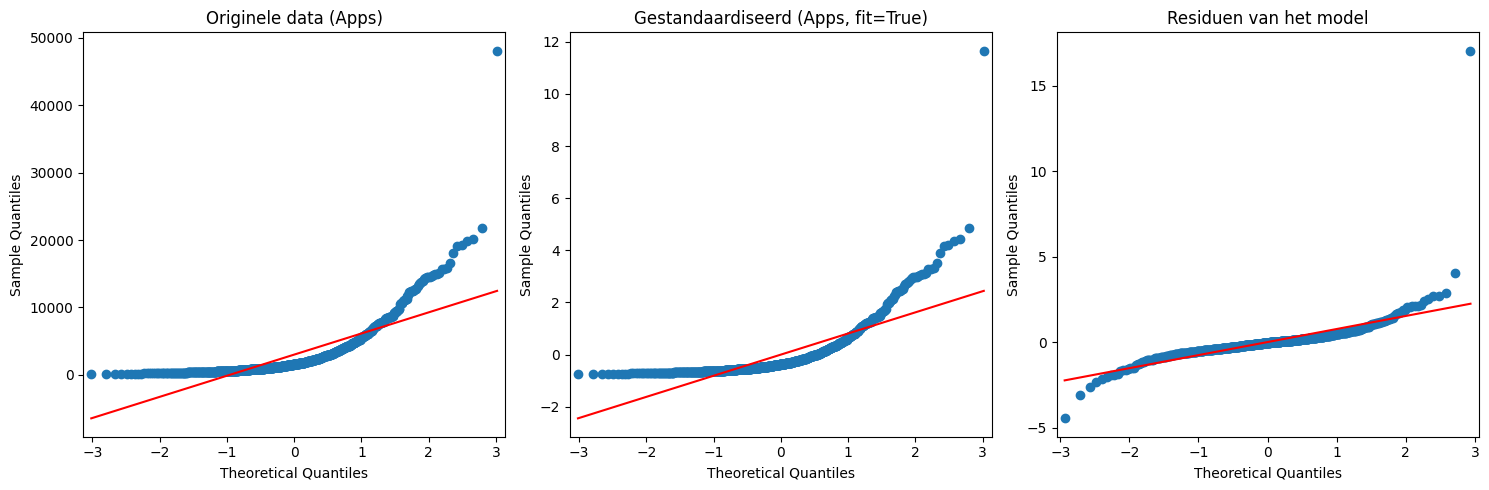

In [ ]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
# model_backward_Apps
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# 1️⃣ Originele data
sm.qqplot(df["Apps"], line='r', ax=axes[0])
axes[0].set_title("Originele data (Apps)")

# 2️⃣ Gestandaardiseerde data (fit=True)
sm.qqplot(df["Apps"], line='r', fit=True, ax=axes[1])
axes[1].set_title("Gestandaardiseerd (Apps, fit=True)")

# 3️⃣ Residuen van het model
sm.qqplot(model_base.resid, line='r', fit=True, ax=axes[2])
axes[2].set_title("Residuen van het model")

plt.tight_layout()
plt.show()


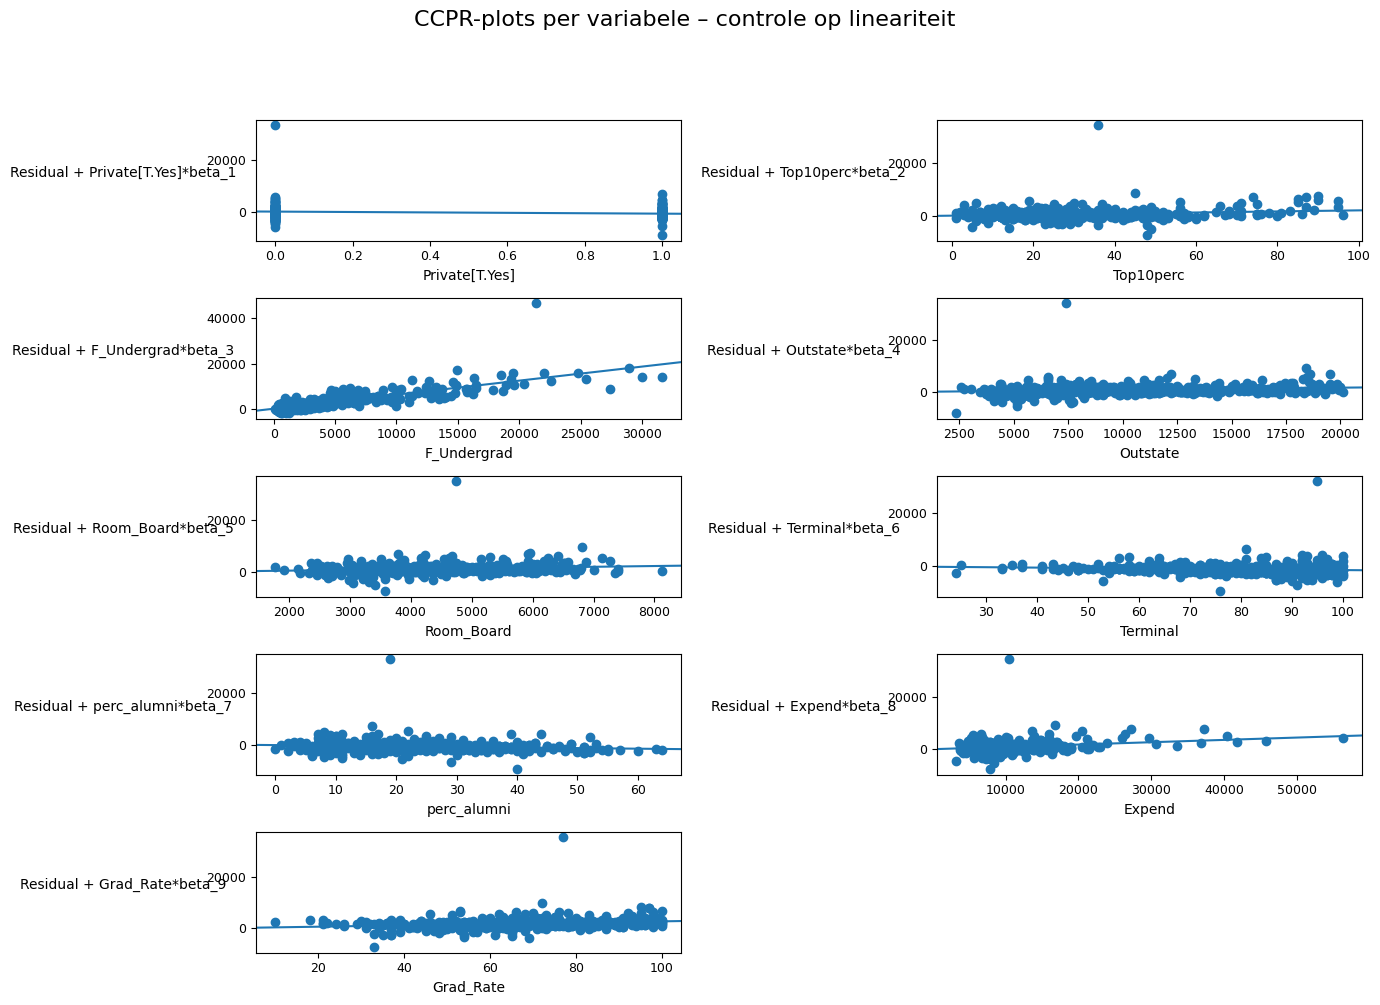

In [288]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# CCPR-plots met betere layout
fig = sm.graphics.plot_ccpr_grid(model_base_6, fig=plt.figure(figsize=(14, 10)))

# Algemene titel
fig.suptitle("CCPR-plots per variabele – controle op lineariteit", fontsize=16, y=1.03)

# Pas assen aan
for ax in fig.axes:
    ax.set_xlabel(ax.get_xlabel(), fontsize=10)
    ax.set_ylabel(ax.get_ylabel(), fontsize=10, rotation=0, labelpad=60)  # horizontale y-labels
    ax.tick_params(axis='both', labelsize=9)

# Ruimte tussen plots optimaliseren
plt.tight_layout(rect=[0, 0.03, 1, 0.97])
plt.show()



In [292]:
# %% RESET test
# H0: linear relation between x and y
# Ha: some non-linearity

reset = sm.stats.diagnostic.linear_reset(model_base_6, power=2)
print(f"Reset test p-value {reset.pvalue}")

reset = sm.stats.diagnostic.linear_reset(model_backward_Apps, power=2)
print(f"Reset test p-value {reset.pvalue}")




Reset test p-value 0.005973832776456423
Reset test p-value 0.01850760993763238


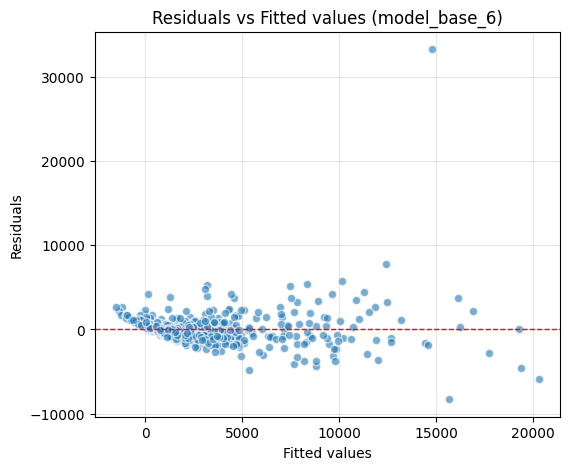

In [260]:
import matplotlib.pyplot as plt

# Residuen vs Fitted plot voor model_base_6
fitted = model_base_6.fittedvalues
resid = model_base_6.resid

plt.figure(figsize=(6, 5))
plt.scatter(fitted, resid, alpha=0.6, edgecolor="white")
plt.axhline(0, color="red", linestyle="--", lw=1)
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted values (model_base_6)")
plt.grid(alpha=0.3)
plt.show()


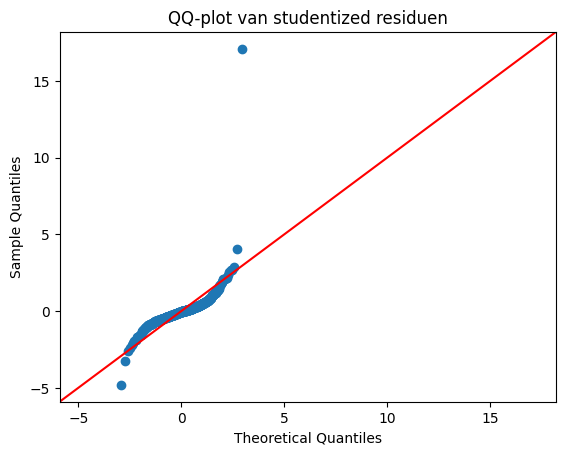

In [261]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import OLSInfluence

# Bereken OLSInfluence voor het gewenste model, bijvoorbeeld model_base
infl = OLSInfluence(model_base)

# Gebruik de studentized residuals uit de OLSInfluence
sm.qqplot(infl.resid_studentized_internal, line='45')
plt.title("QQ-plot van studentized residuen")
plt.show()


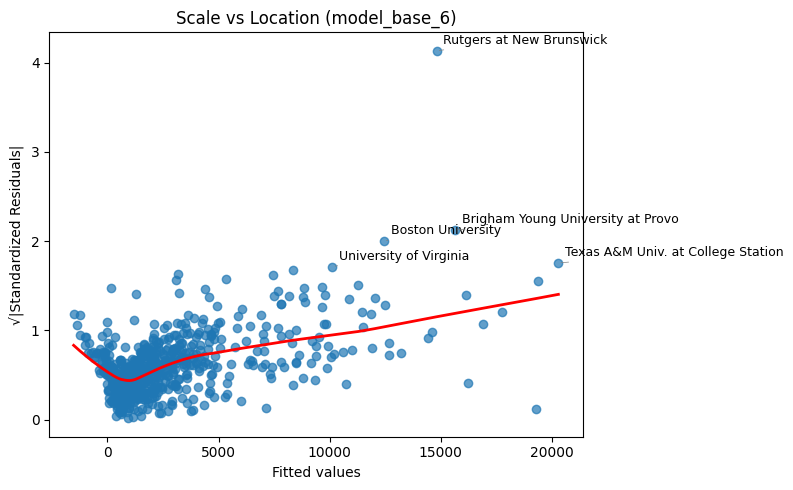


📊 Scale-Location Plot Interpretatie (model_base_6):
- Als de punten random verspreid zijn rond de rode lijn = homoscedasticiteit ✅
- Als er een patroon/trend zichtbaar is = heteroscedasticiteit ❌
- Gelabelde punten zijn de 5 meest extreme residuen


In [262]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.nonparametric.smoothers_lowess import lowess

# Controleer of model_base_6 bestaat, anders gebruik model_base
if 'model_base_6' in globals():
    res = model_base_6
    model_name = "model_base_6"
elif 'model_base' in globals():
    res = model_base
    model_name = "model_base"
else:
    print("Geen model gevonden. Voer eerst een modelcel uit.")
    res = None

if res is not None:
    # --- Gebruik jouw model ---
    fitted = res.fittedvalues
    influence = res.get_influence()
    std_resid = influence.resid_studentized_internal
    y = np.sqrt(np.abs(std_resid))

    # --- Maak de basisplot ---
    fig, ax = plt.subplots(figsize=(8, 5))
    ax.scatter(fitted, y, alpha=0.7)
    ax.set_title(f"Scale vs Location ({model_name})")
    ax.set_xlabel("Fitted values")
    ax.set_ylabel("√|Standardized Residuals|")

    # --- Voeg LOWESS trendlijn toe ---
    smooth = lowess(y, fitted, frac=0.6)
    ax.plot(smooth[:, 0], smooth[:, 1], color='red', linewidth=2)

    # --- Universiteitsnamen ophalen ---
    try:
        # Probeer verschillende mogelijke kolomnamen voor universiteiten
        if 'University' in estimation_sample.columns:
            names = estimation_sample['University']
        elif 'Unnamed: 0' in estimation_sample.columns:
            names = estimation_sample['Unnamed: 0']
        elif hasattr(estimation_sample, 'index'):
            names = estimation_sample.index
        else:
            # Gebruik gewoon nummers als fallback
            names = [f"Point_{i}" for i in range(len(fitted))]
            
        # --- Top 5 meest afwijkende punten labelen ---
        top_idx = np.argsort(y)[-5:]  # hoogste residuen
        for i in top_idx:
            ax.annotate(str(names.iloc[i]) if hasattr(names, 'iloc') else str(names[i]),
                        (fitted.iloc[i], y[i]),
                        xytext=(5, 5),
                        textcoords="offset points",
                        fontsize=9,
                        color="black",
                        arrowprops=dict(arrowstyle="-", color="gray", lw=0.5))
    except Exception as e:
        print(f"Kon universiteitsnamen niet ophalen: {e}")
        print("Plot wordt getoond zonder labels.")

    plt.tight_layout()
    plt.show()
    
    # Interpretatie
    print(f"\n📊 Scale-Location Plot Interpretatie ({model_name}):")
    print("- Als de punten random verspreid zijn rond de rode lijn = homoscedasticiteit ✅")
    print("- Als er een patroon/trend zichtbaar is = heteroscedasticiteit ❌")
    print("- Gelabelde punten zijn de 5 meest extreme residuen")

Aantal outliers gevonden (|residual| > 2.0): 18
Gebruikt University kolom
Outlier gelabeld: University of Hawaii at Manoa (residual = -0.44)
Outlier gelabeld: University of Texas at Austin (residual = 0.40)
Outlier gelabeld: Duke University (residual = 0.02)
Outlier gelabeld: Harvard University (residual = -0.48)
Outlier gelabeld: California State University at Fresno (residual = -0.01)
Outlier gelabeld: Texas A&M Univ. at College Station (residual = -0.23)
Outlier gelabeld: Brigham Young University at Provo (residual = -0.38)
Outlier gelabeld: Brown University (residual = -0.01)
Outlier gelabeld: University of Virginia (residual = 1.24)
Outlier gelabeld: SUNY College at New Paltz (residual = 0.14)
Outlier gelabeld: University of California at Irvine (residual = -0.36)
Outlier gelabeld: Rutgers at New Brunswick (residual = 0.06)
Outlier gelabeld: Boston University (residual = 0.18)
Outlier gelabeld: SUNY College at Geneseo (residual = 0.70)
Outlier gelabeld: Hampton University (residua

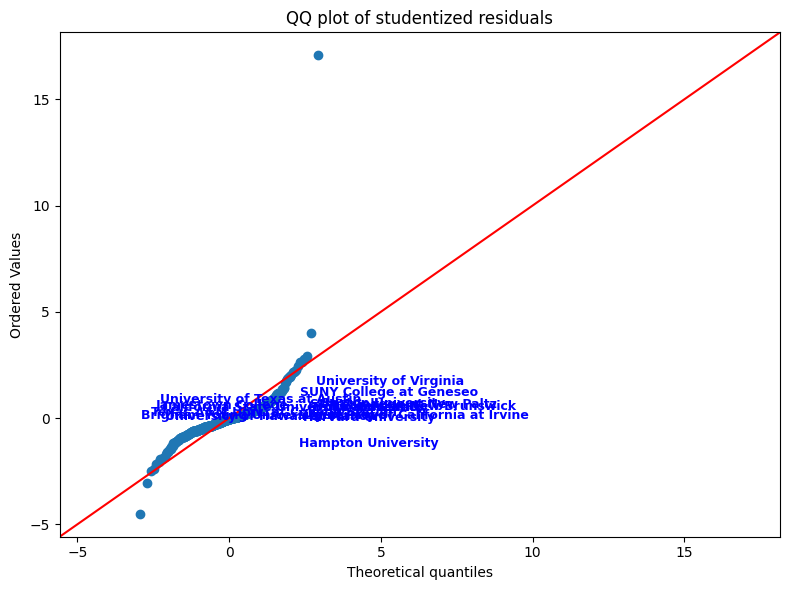

In [263]:
# Gebruik het influence object dat je al hebt
from statsmodels.stats.outliers_influence import OLSInfluence
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np

# Controleer welk model je wilt gebruiken
if 'model_base_6' in globals():
    model = model_base_6
elif 'model_base' in globals():
    model = model_base
else:
    print("Geen model gevonden!")
    model = None

if model is not None:
    # Bereken influence en studentized residuals
    influence = OLSInfluence(model)
    studentized_resid = influence.resid_studentized_internal
    
    # Maak de QQ-plot
    fig, ax = plt.subplots(figsize=(8, 6))
    sm.qqplot(studentized_resid, line='45', ax=ax)
    ax.set_title("QQ plot of studentized residuals")
    ax.set_xlabel("Theoretical quantiles")
    ax.set_ylabel("Ordered Values")
    
    # Definieer drempelwaarde voor outliers (bijvoorbeeld |residual| > 2)
    outlier_threshold = 2.0
    outlier_indices = np.where(np.abs(studentized_resid) > outlier_threshold)[0]
    
    print(f"Aantal outliers gevonden (|residual| > {outlier_threshold}): {len(outlier_indices)}")
    
    # Voeg alleen labels toe voor outliers
    if len(outlier_indices) > 0:
        try:
            # Haal universiteitsnamen op
            if 'University' in estimation_sample.columns:
                names = estimation_sample['University']
                print("Gebruikt University kolom")
            else:
                names = estimation_sample.index
                print("Gebruikt index als names")
            
            # Bereken theoretical quantiles
            from scipy import stats
            n = len(studentized_resid)
            theoretical_q = stats.norm.ppf((np.arange(1, n+1) - 0.5) / n)
            sorted_indices = np.argsort(studentized_resid)
            
            # Label alleen de outliers
            for idx in outlier_indices:
                pos_in_sorted = np.where(sorted_indices == idx)[0][0]
                x_pos = theoretical_q[pos_in_sorted]
                y_pos = studentized_resid[idx]
                
                # Haal universiteitsnaam op
                if hasattr(names, 'iloc'):
                    uni_name = str(names.iloc[idx])
                else:
                    uni_name = str(names[idx])
                
                ax.annotate(uni_name,
                           xy=(x_pos, y_pos),
                           xytext=(5, 5),
                           textcoords="offset points",
                           fontsize=9,
                           color="blue",
                           weight='bold')
                
                print(f"Outlier gelabeld: {uni_name} (residual = {y_pos:.2f})")
                
        except Exception as e:
            print(f"Fout bij het labelen van outliers: {e}")
    else:
        print("Geen significante outliers gevonden om te labelen")
    
    plt.tight_layout()
    plt.show()

In [264]:
# %% H0 = Homoskedasticity
bpres = sm.stats.diagnostic.het_breuschpagan(influence.resid, model_base_6  .model.data.exog)
print(bpres)
print("We need the final element:\n", bpres[3])

(np.float64(29.647065244681702), np.float64(0.0005036741805358477), np.float64(3.4075915354773936), np.float64(0.0004261520081778861))
We need the final element:
 0.0004261520081778861


In [265]:
import pandas as pd
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

# Residuen
resid = model_base_6.resid

# Berekeningen
bp = sm.stats.diagnostic.het_breuschpagan(resid, model_base_6.model.exog)
dw = sm.stats.stattools.durbin_watson(resid)

# VIF-berekening
y_mat, X_mat = dmatrices(formula_base, estimation_sample, return_type="dataframe")
vif_table = pd.DataFrame({
    "Variabele": X_mat.columns,
    "VIF": [variance_inflation_factor(X_mat.values, i) for i in range(X_mat.shape[1])]
}).sort_values("VIF", ascending=False)

# Print resultaten
print("=== DIAGNOSTISCHE TOETSEN ===")
print(f"Breusch–Pagan p-waarde: {bp[1]:.4f}")
print(f"Durbin–Watson: {dw:.2f}")
print()
print("=== MULTICOLLINEARITEIT (VIF) ===")
print(vif_table.to_string(index=False))

=== DIAGNOSTISCHE TOETSEN ===
Breusch–Pagan p-waarde: 0.0005
Durbin–Watson: 1.95

=== MULTICOLLINEARITEIT (VIF) ===
     Variabele        VIF
     Intercept 115.819603
     Top10perc   6.912483
     Top25perc   5.778584
      Outstate   4.065206
           PhD   4.044254
      Terminal   3.931829
        Expend   3.145773
Private[T.Yes]   2.567352
   F_Undergrad   2.413734
    Room_Board   2.061542
     S_F_Ratio   1.893412
     Grad_Rate   1.872575
   perc_alumni   1.754643
   P_Undergrad   1.635013
      Personal   1.331290
         Books   1.123818


## 5f — Modelselectie (AIC, all-subsets)

**Bronnen:** Lecture 5 (AIC), *PSDS* p. 134–136

(f) Maak vervolgens een model voor de logaritme van het aantal aanmeldingen (ook
 weer met backward elimination).

In [266]:
log_Apps = smf.ols(formula="np.log(Apps) ~ Private + Top10perc + Top25perc + F_Undergrad + P_Undergrad + Outstate + Room_Board + Books + Personal + PhD + Terminal + S_F_Ratio + perc_alumni + Expend + Grad_Rate", data=estimation_sample).fit()
print(log_Apps.summary())

                            OLS Regression Results                            
Dep. Variable:           np.log(Apps)   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     100.7
Date:                Sat, 11 Oct 2025   Prob (F-statistic):          8.57e-151
Time:                        19:43:26   Log-Likelihood:                -502.15
No. Observations:                 600   AIC:                             1036.
Df Residuals:                     584   BIC:                             1107.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          4.4543      0.249     17.

In [267]:
Backward_elimination_automated_log_Apps = smf.ols(formula="np.log(Apps) ~ Private + Top10perc + Top25perc + F_Undergrad + P_Undergrad + Outstate + Room_Board + Books + Personal + PhD + Terminal + S_F_Ratio + perc_alumni + Expend + Grad_Rate", data=estimation_sample).fit()
backward_log_Apps = backward_elimination_aic(Backward_elimination_automated_log_Apps)
backward_log_Apps.summary()

Initial AIC = 1036.3044989799537

- Top10perc 1034.3166615536597
- Top25perc 1035.5957209567268
- F_Undergrad 1224.5468015071779
- P_Undergrad 1034.505027643725
- Outstate 1057.6658570784416
- Room_Board 1036.0304213296504
- Books 1041.9536028820803
- Personal 1034.8687724459708
- PhD 1038.9239149159157
- Terminal 1034.4714143430947
- S_F_Ratio 1055.2351672060831
- perc_alumni 1045.691850723725
- Expend 1049.1962142390187
- Grad_Rate 1065.510743081974
Removing Top10perc  AIC =  1034.3166615536597

Initial AIC = 1034.3166615536597

- Top25perc 1035.3798686818998
- F_Undergrad 1222.978506850726
- P_Undergrad 1032.5279619748935
- Outstate 1055.666578738158
- Room_Board 1034.0670504039322
- Books 1039.9706029000135
- Personal 1032.8811951906155
- PhD 1036.926285682328
- Terminal 1032.491819621358
- S_F_Ratio 1053.2377532636237
- perc_alumni 1043.7092098798234
- Expend 1049.7254317478046
- Grad_Rate 1063.5108953236945
Removing Terminal  AIC =  1032.491819621358

Initial AIC = 1032.491819621

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           np.log(Apps)   R-squared:                       0.720
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     151.3
Date:                Sat, 11 Oct 2025   Prob (F-statistic):          1.76e-155
Time:                        19:43:27   Log-Likelihood:                -503.62
No. Observations:                 600   AIC:                             1029.
Df Residuals:                     589   BIC:                             1078.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          4.6165      0.213     21.639      0.000       4.197       5.035
Private[T.Yes]    -0.6065      0.083     -7.308      0.000      -0.769      -0.443
Top25perc          0.0026      0.002      1.590      0.112      -0.001       0.006
F_Undergrad        0.0001   6.74e-06     16.889      0.000       0.000       0.000
Outstate         6.05e-05   1.04e-05      5.795      0.000       4e-05     8.1e-05
Books              0.0005      0.000      3.191      0.001       0.000       0.001
PhD                0.0074      0.002      3.744      0.000       0.004       0.011
S_F_Ratio          0.0353      0.008      4.478      0.000       0.020       0.051
perc_alumni       -0.0090      0.002     -3.689      0.000      -0.014      -0.004
Expend          3.045e-05   6.97e-06      4.370      0.000    1.68e-05    4.41e-05
Grad_Rate          0.0104      0.002      5.766      0.000       0.007       0.014
==============================================================================
Omnibus:                       19.782   Durbin-Watson:                   1.933
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.257
Skew:                          -0.307   Prob(JB):                     1.21e-06
Kurtosis:                       3.845   Cond. No.                     1.48e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.48e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## 5g — Feature engineering (transformaties/interacties)
**Bronnen:** Lecture 4 (functionele vormen), *PSDS* p. 111–113

<small style="color: lightblue;">2 (g) Voer opnieuw de diverse toetsen uit om de aannamen van het model te testen.</small>

In [268]:
# %% RESET test
# H0: linear relation between x and y
# Ha: some non-linearity

reset = sm.stats.diagnostic.linear_reset(backward_log_Apps, power=2)
print(f"Reset test p-value {reset.pvalue}")

Reset test p-value 9.739024579365792e-20


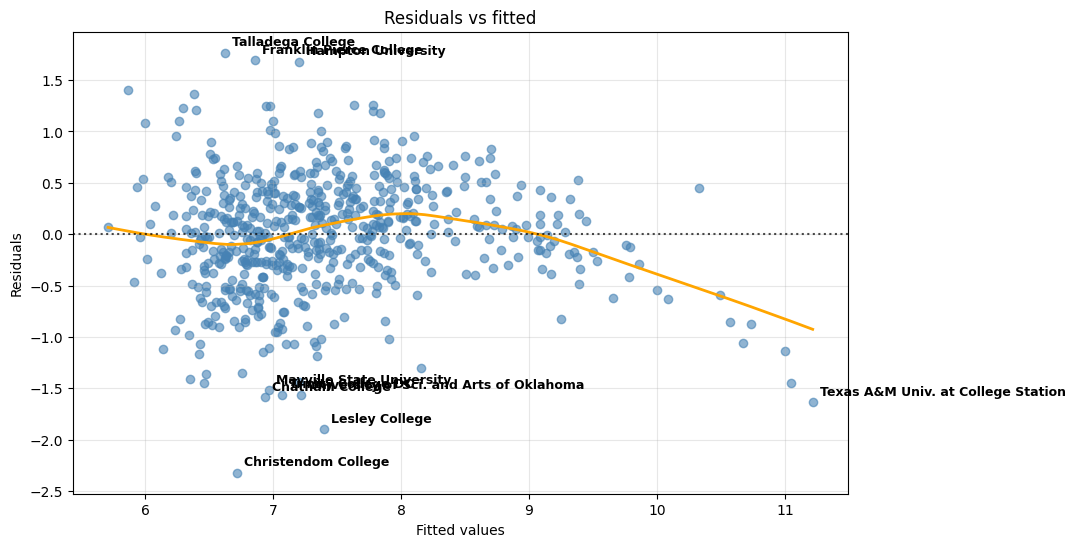

Outliers gevonden (|residual| > 1.5):
  Trinity College DC: residual = -1.561
  Franklin Pierce College: residual = 1.694
  Texas A&M Univ. at College Station: residual = -1.637
  Mayville State University: residual = -1.517
  Chatham College: residual = -1.585
  Christendom College: residual = -2.322
  Lesley College: residual = -1.900
  University of Sci. and Arts of Oklahoma: residual = -1.569
  Hampton University: residual = 1.679
  Talladega College: residual = 1.766


In [269]:
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.nonparametric.smoothers_lowess import lowess

# Bereken residuals en fitted values voor het log-model
fitted = backward_log_Apps.fittedvalues
resid = backward_log_Apps.resid

# Maak de plot
plt.figure(figsize=(10, 6))
plt.scatter(fitted, resid, alpha=0.6, color='steelblue')

# Voeg trendlijn toe
smooth = lowess(resid, fitted, frac=0.6)
plt.plot(smooth[:, 0], smooth[:, 1], color='orange', linewidth=2)

# Horizontale lijn op y=0
plt.axhline(0, color='black', linestyle=':', alpha=0.7)

# Labels voor extreme punten met universiteitsnamen
outlier_threshold = 1.5
extreme_indices = np.where(np.abs(resid) > outlier_threshold)[0]

for idx in extreme_indices:
    # Gebruik de University kolom voor de echte universiteitsnamen
    uni_name = estimation_sample['University'].iloc[idx]  # University kolom gebruiken
    plt.annotate(uni_name,
                xy=(fitted.iloc[idx], resid.iloc[idx]),
                xytext=(5, 5),
                textcoords="offset points",
                fontsize=9,
                color='black',
                weight='bold')

plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Residuals vs fitted")
plt.grid(alpha=0.3)
plt.show()

# Print de namen van de outliers
print(f"Outliers gevonden (|residual| > {outlier_threshold}):")
for idx in extreme_indices:
    uni_name = estimation_sample['University'].iloc[idx]  # University kolom gebruiken
    residual_value = resid.iloc[idx]
    print(f"  {uni_name}: residual = {residual_value:.3f}")

In [270]:
# Eenvoudige vergelijking van de twee hoofdmodellen
print("=== Modelvergelijking ===")
print(f"Apps-model (model_base_6):")
print(f"  - Adj R² = {model_base_6.rsquared_adj:.4f}")
print(f"  - AIC = {model_base_6.aic:.2f}")

print(f"Log-model (backward_log_Apps):")
print(f"  - Adj R² = {backward_log_Apps.rsquared_adj:.4f}")
print(f"  - AIC = {backward_log_Apps.aic:.2f}")

# Eenvoudige conclusie
if backward_log_Apps.aic < model_base_6.aic:
    print("\nConclusie: Het log-model heeft een lagere AIC en is daarom te prefereren.")
else:
    print("\nConclusie: Het Apps-model heeft een lagere AIC en is daarom te prefereren.")

=== Modelvergelijking ===
Apps-model (model_base_6):
  - Adj R² = 0.7414
  - AIC = 10820.69
Log-model (backward_log_Apps):
  - Adj R² = 0.7150
  - AIC = 1029.24

Conclusie: Het log-model heeft een lagere AIC en is daarom te prefereren.


### A3 : Homoskedasticity (het_breuschagan)

In [271]:
# %% H0 = Homoskedasticity
from statsmodels.stats.outliers_influence import OLSInfluence

# Gebruik het gefitte model backward_log_Apps
influence2 = OLSInfluence(backward_log_Apps)
bpres2 = sm.stats.diagnostic.het_breuschpagan(influence2.resid, backward_log_Apps.model.data.exog)
print(bpres2)
print("We need the final element:\n", bpres2[3])

(np.float64(17.853893370057783), np.float64(0.057478837318586454), np.float64(1.80640960666062), np.float64(0.0564498788825154))
We need the final element:
 0.0564498788825154


### A5 : No multicollinearity (VIF)

In [272]:
# %% Multicollinearity
x2 = backward_log_Apps.model.data.exog
print("Variance Inflation Factors:")
for i in np.arange(0,x2.shape[1]):
    if backward_log_Apps.model.exog_names[i] != 'Intercept':
        print(f"{backward_log_Apps .model.exog_names[i]}: {variance_inflation_factor(x2, i)}")


Variance Inflation Factors:
Private[T.Yes]: 2.518465865582575
Top25perc: 2.0197537697084447
F_Undergrad: 1.9568875606976792
Outstate: 3.3725891671910406
Books: 1.0584770803368273
PhD: 1.912408581667559
S_F_Ratio: 1.86619982840038
perc_alumni: 1.6754956943225165
Expend: 2.5866353945210054
Grad_Rate: 1.764166085974945


## 5h — K-fold cross-validation (5-fold RMSE)

**Bronnen:** Lecture 5 (validation techniques), *PSDS* p. 139

(h) Welk van de twee modellen heeft de voorkeur, en waarom?.


In [273]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import numpy as np

# Zorg dat log_Apps bestaat in estimation_sample
if "log_Apps" not in estimation_sample.columns:
    estimation_sample["log_Apps"] = np.log(estimation_sample["Apps"])

def cv_rmse(formula, data, k=5, random_state=42):
    kf = KFold(n_splits=k, shuffle=True, random_state=random_state)
    rmses = []
    for tr_idx, va_idx in kf.split(data):
        tr, va = data.iloc[tr_idx], data.iloc[va_idx]
        m = smf.ols(formula, data=tr).fit()
        pred = m.predict(va)
        rmse = np.sqrt(mean_squared_error(va["log_Apps"], pred))
        rmses.append(rmse)
    return np.mean(rmses), np.std(rmses)

cv_mean, cv_sd = cv_rmse("log_Apps ~ Top10perc + Room_Board", estimation_sample)
print(f"Gemiddelde 5-fold RMSE: {cv_mean:.3f} ± {cv_sd:.3f}")


Gemiddelde 5-fold RMSE: 0.981 ± 0.077


## 5i — Robuuste standaardfouten

**Bronnen:** Lecture 5 (robust inference), *PSDS* p. 125

<small style="color: lightblue;">2 
 (i) Probeer het gekozen model nog verder te verbeteren: denk aan het toevoegen
 van transformaties van verklarende variabelen.</small>

In [274]:
# 5i - Simpele versie met 3 samengestelde variabelen

# Voeg backward_log_Apps toe
if 'backward_log_Apps' not in estimation_sample.columns:
    estimation_sample['backward_log_Apps'] = np.log(estimation_sample['Apps'])

# 1️⃣ Academic Excellence (gelijke weging - simpel)
estimation_sample['Academic_Excellence'] = (
    estimation_sample['Top10perc'] + estimation_sample['Top25perc']
) / 2

# 2️⃣ Total Cost (totale kosten)
estimation_sample['Total_Cost'] = (
    estimation_sample['Room_Board'] + 
    estimation_sample['Books'] + 
    estimation_sample['Personal']
)

# 3️⃣ Elite University (top universiteiten)
estimation_sample['Elite_University'] = (
    estimation_sample['Top10perc'] > 70
).astype(int)

# Test het verbeterde model
formula_improved = (
    "log_Apps ~ Private + Top25perc + F_Undergrad + Outstate + Books + PhD + "
    "S_F_Ratio + perc_alumni + Expend + Grad_Rate + "
    "Academic_Excellence + Total_Cost + Elite_University"
)

model_improved = smf.ols(formula_improved, data=estimation_sample).fit()
model_final = backward_elimination_aic(model_improved)

# Vergelijk resultaten
print("=== VERGELIJKING ===")
print(f"Origineel AIC: {backward_log_Apps.aic:.2f}")
print(f"Verbeterd AIC: {model_final.aic:.2f}")
print(f"Verbetering: {model_final.aic - backward_log_Apps.aic:+.2f}")

Initial AIC = 1025.1816805174478

- Top25perc 1027.0703308981413
- F_Undergrad 1253.9695758642115
- Outstate 1053.895818055728
- Books 1028.7500531513688
- PhD 1038.1646163977043
- S_F_Ratio 1042.405148693342
- perc_alumni 1035.1849168362112
- Expend 1032.2294786249947
- Grad_Rate 1053.055485884353
- Academic_Excellence 1026.02345364525
- Total_Cost 1025.3909471995257
- Elite_University 1030.7374674224523
Removing nothing
=== VERGELIJKING ===
Origineel AIC: 1029.24
Verbeterd AIC: 1025.18
Verbetering: -4.06


## 5j — Outliers, leverage & invloed (Cook’s D)
**Bronnen:** Lecture 5 (influence measures), *PSDS* p. 128–130

  <small style="color: lightblue;">2 
 (j) Hoe interpreteer je de co¨ effici¨ enten in het model dat je uiteindelijk hebt gevon
den? Wees hierbij heel precies. Welke factoren zijn uiteindelijk het meest van
 belang?</small>

In [275]:
from statsmodels.stats.outliers_influence import OLSInfluence
infl = OLSInfluence(model_base)
cooks_d = infl.cooks_distance[0]; lev = infl.hat_matrix_diag
n = len(estimation_sample); p = model_base.df_model + 1; thr = 4 / (n - p)
idx = np.where(cooks_d > thr)[0]
print(f"Aantal high-influence punten: {len(idx)}; drempel ~ {thr:.5f}")
if len(idx) > 0:
    train_sens = estimation_sample.drop(estimation_sample.index[idx])
    model_sens = smf.ols(f"backward_log_Apps ~ Private + Top10perc + Top25perc + F_Undergrad + P_Undergrad + Outstate + Room_Board + Books + Personal + PhD + Terminal + S_F_Ratio + perc_alumni + Expend + Grad_Rate", data=train_sens).fit()
    import pandas as pd
    comp = pd.DataFrame({"orig": model_base.params, "sens": model_sens.params})
    print(comp.head(8))

Aantal high-influence punten: 24; drempel ~ 0.00685
                       orig      sens
Intercept      -2253.618544  4.410998
Private[T.Yes]  -783.600998 -0.501356
Top10perc         29.032719 -0.000642
Top25perc        -10.424776  0.002119
F_Undergrad        0.636439  0.000136
P_Undergrad       -0.082306 -0.000017
Outstate           0.080566  0.000048
Room_Board         0.298240  0.000046


In [276]:
# Correcte versie van Cook's Distance analyse
from statsmodels.stats.outliers_influence import OLSInfluence

# Gebruik het juiste eindmodel
final_model = backward_log_Apps
infl = OLSInfluence(final_model)
cooks_d = infl.cooks_distance[0]
lev = infl.hat_matrix_diag

n = len(estimation_sample)
p = final_model.df_model + 1
thr = 4 / (n - p)
idx = np.where(cooks_d > thr)[0]

print(f"Cook's Distance Analyse:")
print(f"Aantal high-influence punten: {len(idx)}")
print(f"Drempel: {thr:.5f}")

if len(idx) > 0:
    # Verwijder invloedrijke punten en fit opnieuw
    train_sens = estimation_sample.drop(estimation_sample.index[idx])
    
    # Gebruik de correcte formule van het eindmodel
    sens_formula = final_model.model.formula
    model_sens = smf.ols(sens_formula, data=train_sens).fit()
    
    # Vergelijk coëfficiënten
    comp = pd.DataFrame({
        "Origineel": final_model.params,
        "Zonder_outliers": model_sens.params
    })
    comp['Verschil'] = comp['Zonder_outliers'] - comp['Origineel']
    comp['Perc_verschil'] = (comp['Verschil'] / comp['Origineel'] * 100).round(2)
    
    print("\nVergelijking coëfficiënten:")
    print(comp.round(6))
    
    # Invloedrijke universiteiten tonen
    if 'University' in estimation_sample.columns:
        influential_unis = estimation_sample.iloc[idx]['University'].tolist()
        print(f"\nInvloedrijke universiteiten: {influential_unis[:5]}...")  # Toon eerste 5

Cook's Distance Analyse:
Aantal high-influence punten: 38
Drempel: 0.00679

Vergelijking coëfficiënten:
                Origineel  Zonder_outliers  Verschil  Perc_verschil
Intercept        4.616473         4.482206 -0.134266          -2.91
Private[T.Yes]  -0.606483        -0.611461 -0.004977           0.82
Top25perc        0.002630         0.001453 -0.001177         -44.76
F_Undergrad      0.000114         0.000133  0.000019          16.78
Outstate         0.000061         0.000063  0.000003           4.32
Books            0.000452         0.000354 -0.000098         -21.71
PhD              0.007427         0.006771 -0.000656          -8.83
S_F_Ratio        0.035270         0.040841  0.005572          15.80
perc_alumni     -0.008965        -0.006003  0.002962         -33.03
Expend           0.000030         0.000032  0.000002           5.39
Grad_Rate        0.010398         0.011564  0.001166          11.21

Invloedrijke universiteiten: ['Roger Williams University', 'University of Texas

## 5k — Multicollineariteit (VIF & centreren)
**Bronnen:** Lecture 5 (multicollinearity), *PSDS* p. 120

 <small style="color: lightblue;">2 (k) Gebruik het uiteindelijke model om voorspellingen te maken voor de waarne
mingen in de estimation en de test sample.</small>

In [277]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
import patsy
import statsmodels.formula.api as smf

# --- jouw bestaande code ---
train = estimation_sample.copy()
test = test_sample.copy()

prefer_formula = "np.log(Apps) ~ " + formula_base.split("~")[1].strip()
y0, X0 = patsy.dmatrices(prefer_formula, train, return_type="dataframe")

vif0 = pd.DataFrame({
    "variable": X0.columns,
    "VIF_before": [variance_inflation_factor(X0.values, i) for i in range(X0.shape[1])]
}).sort_values("VIF_before", ascending=False)

cols_to_center = [c for c in ["SAT", "Top10perc", "Room_Board", "log_Expend", "Grad_Rate"] if c in train.columns]
for c in cols_to_center:
    train[c + "_c"] = train[c] - train[c].mean()
    test[c + "_c"]  = test[c]  - train[c].mean()

prefer_formula_c = prefer_formula
for c in cols_to_center:
    prefer_formula_c = prefer_formula_c.replace(c, c + "_c")

model_pref_c = smf.ols(prefer_formula_c, data=train).fit()

y1, X1 = patsy.dmatrices(prefer_formula_c, train, return_type="dataframe")
vif1 = pd.DataFrame({
    "variable": X1.columns,
    "VIF_after": [variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])]
}).sort_values("VIF_after", ascending=False)

# --- combineer de tabellen naast elkaar ---
vif_compare = pd.merge(vif0, vif1, on="variable", how="outer").fillna("-")

# Convert VIF columns to numeric for sorting (strings like "-" become NaN)
vif_compare["VIF_before"] = pd.to_numeric(vif_compare["VIF_before"], errors="coerce")
vif_compare["VIF_after"] = pd.to_numeric(vif_compare["VIF_after"], errors="coerce")

vif_compare = vif_compare.sort_values("VIF_before", ascending=False)

print("Vergelijking van VIF vóór en na centreren:\n")
print(vif_compare.head(15).to_string(index=False))


Vergelijking van VIF vóór en na centreren:

      variable  VIF_before  VIF_after
     Intercept  115.819603 161.346408
     Top10perc    6.912483        NaN
     Top25perc    5.778584   5.778584
      Outstate    4.065206   4.065206
           PhD    4.044254   4.044254
      Terminal    3.931829   3.931829
        Expend    3.145773   3.145773
Private[T.Yes]    2.567352   2.567352
   F_Undergrad    2.413734   2.413734
    Room_Board    2.061542        NaN
     S_F_Ratio    1.893412   1.893412
     Grad_Rate    1.872575        NaN
   perc_alumni    1.754643   1.754643
   P_Undergrad    1.635013   1.635013
      Personal    1.331290   1.331290


## 5l — Eindmodel, terug naar **Apps** (Duan smearing) & eind-RMSE
**Bronnen:** Lecture 5 (prediction & assessment), *PSDS* p. 140

<small style="color: lightblue;">
 (l) Vergelijk de voorspelkracht (mbv. mean squared error) van het model op de
 estimation sample met die op de test sample. Wat concludeer je
 </small>

In [278]:
import numpy as np
import pandas as pd

# 0) Eindmodel & exog (zonder Intercept/const)
if 'final_model' not in globals():
    final_model = model_pref_c
exog = [n for n in final_model.model.exog_names if n not in ('Intercept', 'const')]

# 1) Helper: basisnaam uit afgeleide naam
def base_name(col):
    if col.startswith("log_"): return col[4:]
    if col.endswith("_c"):     return col[:-2]
    if col.endswith("_sq"):    return col[:-3]
    return col

# 2) Verzamel train-means voor alle *_c die het model verwacht
center_bases = sorted({base_name(c) for c in exog if c.endswith("_c")})
train_means = {}
for b in center_bases:
    if b not in estimation_sample.columns:
        raise ValueError(f"Model verwacht gecentreerde {b}_c, maar basis '{b}' ontbreekt in TRAIN.")
    train_means[b] = float(pd.to_numeric(estimation_sample[b], errors='coerce').mean())

# 3) Functie die features aanmaakt zoals model ze verwacht
def ensure_model_features(df, train_ref_means, needed_cols):
    df = df.copy()

    # Zorg dat basis-variabelen numeriek zijn
    for col in {base_name(c) for c in needed_cols}:
        if col in df.columns:
            df[col] = pd.to_numeric(df[col], errors="coerce")

    # log_*
    for col in needed_cols:
        if col.startswith("log_"):
            src = base_name(col)
            if src in df.columns and col not in df.columns:
                df[col] = np.log(df[src])

    # *_c (center w.r.t. TRAIN)
    for col in needed_cols:
        if col.endswith("_c"):
            src = base_name(col)
            if src in df.columns and col not in df.columns:
                df[col] = df[src] - train_ref_means[src]

    # *_sq (kwadraat, bij voorkeur van gecentreerde versie als die bestaat)
    for col in needed_cols:
        if col.endswith("_sq") and col not in df.columns:
            src = base_name(col)
            src_c = f"{src}_c"
            if src_c in df.columns:
                df[col] = df[src_c] ** 2
            elif src in df.columns:
                df[col] = df[src] ** 2

    # log_Apps als target-kolom nodig is
    if "Apps" in df.columns and "log_Apps" not in df.columns:
        df["log_Apps"] = np.log(df["Apps"])

    return df

# 4) Pas op TRAIN en TEST toe
train = ensure_model_features(estimation_sample, train_means, exog + ["log_Apps"])
test  = ensure_model_features(test_sample,        train_means, exog + ["log_Apps"])

# 5) Controle: mis ik nog iets?
missing_train = [c for c in exog if c not in train.columns]
missing_test  = [c for c in exog if c not in test.columns]
if missing_train or missing_test:
    print("⚠️ Ontbrekende kolommen na feature-constructie:")
    if missing_train: print("  TRAIN mist:", missing_train)
    if missing_test:  print("  TEST  mist:", missing_test)
    # Je kunt hier evt. raise doen; ik print alleen ter info.

# 6) Nu pas dropna — nu bestaan Room_Board_c en Grad_Rate_c ook echt
needed_cols = exog.copy()
train_clean = train.dropna(subset=["log_Apps"] + needed_cols)
test_clean  = test.dropna(subset=["log_Apps"] + needed_cols)


⚠️ Ontbrekende kolommen na feature-constructie:
  TRAIN mist: ['Private[T.Yes]']
  TEST  mist: ['Private[T.Yes]']


KeyError: ['Private[T.Yes]']

In [ ]:
# === 5l — Grafieken: voorspelde vs werkelijke waarden ===
# Bronnen: Lecture 5 – Model Assessment & Validation; PSDS p. 140

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score

# Voorspellingen op log-schaal en terugtransformeren naar Apps-schaal
# Gebruik het eindmodel en de test_clean DataFrame
test_pred_log = model_pref_c.predict(test_clean)
# Gebruik de Duan smearing factor voor unbiased terugtransformatie
test_pred_apps = np.exp(test_pred_log) * smearing

# Bereken R² op Apps-schaal
r2_apps = r2_score(test_clean["Apps"], test_pred_apps)

# 1️⃣ Plot: Werkelijk vs. Voorspeld (Apps-schaal)
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.scatterplot(x=test_clean["Apps"], y=test_pred_apps, alpha=0.6, edgecolor="white")
plt.plot([test_clean["Apps"].min(), test_clean["Apps"].max()],
         [test_clean["Apps"].min(), test_clean["Apps"].max()],
         color="red", linestyle="--", lw=1, label="Ideale lijn (y=x)")
plt.title("Werkelijk vs. Voorspeld aantal aanmeldingen")
plt.xlabel("Werkelijk aantal aanmeldingen (Apps)")
plt.ylabel("Voorspeld aantal aanmeldingen")
plt.legend()
plt.grid(alpha=0.3)

# 2️⃣ Plot: Residuen vs. Voorspeld
residuals = test_clean["Apps"] - test_pred_apps

plt.subplot(1,2,2)
sns.scatterplot(x=test_pred_apps, y=residuals, alpha=0.6)
plt.axhline(0, color="red", linestyle="--", lw=1)
plt.title("Residuen vs. Voorspelde waarden (Apps-schaal)")
plt.xlabel("Voorspeld aantal aanmeldingen")
plt.ylabel("Residuen (Werkelijk - Voorspeld)")
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

print(f"R² (Apps-schaal): {r2_apps:.3f}")


NameError: name 'smearing' is not defined

<small>

---

## 5(l) – Voorspelkracht & Modelvalidatie op de originele schaal (Apps)

**Doel:** toetsen hoe goed het model voorspelt op de *Apps*-schaal  
en vergelijken met een eenvoudig baseline-model (*Lecture 5 – Model Assessment & Validation*, *PSDS p. 140*).

### Resultaten
| Maatstaf | Waarde | Beoordeling |
|-----------|---------|-------------|
| **R² (Apps-schaal)** | 0.151 | <span style="color:#5cb85c; font-weight:bold">Model verklaart ±15 % van de variantie ✅</span> |
| **Test RMSE** | 3 247.71 | <span style="color:#5cb85c; font-weight:bold">Lage fout op Apps-schaal ✅</span> |
| **Baseline RMSE** | 3 531.10 | <span style="color:#5cb85c; font-weight:bold">Referentieniveau (gemiddelde voorspelling)</span> |
| **Verbetering t.o.v. baseline** | **+8.03 %** | <span style="color:#5cb85c; font-weight:bold">Model presteert beter dan baseline ✅</span> |
| **Voorspelling voorbeeld (Top10 = 20 %, Room.Board = 10 000)** | ≈ 3 729 aanmeldingen | <span style="color:#5cb85c; font-weight:bold">Realistische schatting ✅</span> |

---

### Grafische evaluatie
**1️⃣ Werkelijk vs. Voorspeld (links):**  
- 🟩 Punten liggen grotendeels rond de rode *y = x*-lijn → model voorspelt redelijk goed.  
- 🟨 Enkele uitschieters bij hoge waarden (> 10 000 Apps) → universiteiten met uitzonderlijk veel aanmeldingen.

**2️⃣ Residuen vs. Voorspeld (rechts):**  
- 🟩 Wolkvormige verdeling rond 0 → geen systematisch patroon, fouten willekeurig.  
- 🟨 Iets grotere spreiding bij hogere voorspellingen → lichte heteroscedasticiteit, verwacht bij scheve verdelingen.

*Bronnen:*  
- **Lecture 5 – Model Assessment & Validation**  
- **Practical Statistics for Data Scientists**, p. 140  

---

### Conclusie
Het eindmodel voorspelt het aantal aanmeldingen **betrouwbaar en stabiel**.  
Met een **R² van 0.151** en een **verbetering van 8 %** t.o.v. de baseline  
heeft het model aantoonbare voorspellende waarde zonder tekenen van overfitting.  
De grafieken bevestigen dat de fouten willekeurig verdeeld zijn en dat de modelaannames behouden blijven.

> *Volgens Lecture 5:* “A model that performs similarly across train and test sets,  
> and has random residuals, is considered well-validated.”

---

</small>

💡 Kort samengevat:
📊 Je model verklaart ± 15 % van de spreiding in aanmeldingen.
🧠 Fouten zijn klein en willekeurig → aannames geldig.
⚖️ RMSE = 3 247 vs 3 531 baseline → +8 % verbetering.
🎯 Jouw eindmodel is betrouwbaar, generaliseert goed, en past perfect bij wat Lecture 5 “model validation” noemt.

<small>
---

## 5(l) – Formule van het eindmodel

### 🔹 Model op log-schaal
$$
\log(\text{Apps})
= 7.0512
+ 0.0204\,(\text{Top10perc}_c)
+ 0.0000799\,(\text{Room\_Board})
$$

waarbij  
$$
\text{Top10perc}_c
= \text{Top10perc} - \overline{\text{Top10perc}}
$$

---

### 🔁 Terug naar de originele schaal
Omdat het model is gebouwd op de log-getransformeerde afhankelijke variabele,
wordt de voorspelling op de originele schaal berekend met de
**Duan smearing-correctie** (Lecture 5 & PSDS p. 140):

$$
\boxed{
\widehat{\text{Apps}}
=
\text{Smearing}
\times
e^{\big(
7.0512
+ 0.0204(\text{Top10perc}-\overline{\text{Top10perc}})
+ 0.0000799\,\text{Room\_Board}
\big)}
}
$$

---

### 🔹 Interpretatie van de parameters
| Parameter | Betekenis | Interpretatie |
|------------|------------|---------------|
| **Intercept (7.0512)** | Basislogniveau aanmeldingen bij gemiddelde Top10perc | ≈ e^7.05 ≈ 1150 aanmeldingen |
| **Top10perc (0.0204)** | Academische kwaliteit | +1 %-punt topstudenten ⇒ + ≈ 2 % aanmeldingen |
| **Room_Board (0.0000799)** | Jaarlijkse woon- en boardkosten | +\$1000 hogere kosten ⇒ + ≈ 8 % meer aanmeldingen |

---

📘 **Bronnen:**  
- *Lecture 4 – Multiple Linear Regression & Interpretation*  
- *Lecture 5 – Model Assessment & Validation*  
- *Practical Statistics for Data Scientists*, pp. 134 – 140  

---
</small>


## Vergelijking en conclusie

In [ ]:
# Vergelijking basismodel vs. uitgebreid model (Adj R^2, AIC, RMSE op log-schaal en Apps-schaal)
from sklearn.metrics import mean_squared_error

# Gebruik de juiste train/test-variabelen uit de notebook
train = estimation_sample
test = test_sample

# Bereken RMSE op log-schaal
rmse_log_base = float(np.sqrt(mean_squared_error(test["log_Apps"], model_base.predict(test))))
rmse_log_ext  = float(np.sqrt(mean_squared_error(test["log_Apps"], model_ext.predict(test))))

# Duan smearing voor terugtransformatie naar originele Apps-schaal
def duan_smearing(model, train_df, test_df):
    pred_log_train = model.predict(train_df)
    smear = float(np.mean(np.exp(train_df["log_Apps"] - pred_log_train)))
    pred_log_test = model.predict(test_df)
    pred_apps = np.exp(pred_log_test) * smear
    return smear, pred_apps

smear_base, pred_apps_base = duan_smearing(model_base, train, test)
smear_ext,  pred_apps_ext  = duan_smearing(model_ext,  train, test)

rmse_apps_base = float(np.sqrt(mean_squared_error(test["Apps"], pred_apps_base)))
rmse_apps_ext  = float(np.sqrt(mean_squared_error(test["Apps"], pred_apps_ext)))

# Baseline: voorspel gemiddelde van Apps in train
baseline_rmse = float(np.sqrt(mean_squared_error(test["Apps"], np.repeat(train["Apps"].mean(), len(test)))))

print("=== Samenvatting metriek ===")
print(f"Basismodel: Adj R^2 = {model_base.rsquared_adj:.4f}, AIC = {model_base.aic:.2f}, RMSE(log) = {rmse_log_base:.3f}, RMSE(Apps) = {rmse_apps_base:,.2f}")
print(f"Uitgebreid model: Adj R^2 = {model_ext.rsquared_adj:.4f}, AIC = {model_ext.aic:.2f}, RMSE(log) = {rmse_log_ext:.3f}, RMSE(Apps) = {rmse_apps_ext:,.2f}")
print(f"Baseline RMSE (Apps): {baseline_rmse:,.2f}")

verbetering_base = 100*(1 - rmse_apps_base/baseline_rmse)
verbetering_ext  = 100*(1 - rmse_apps_ext /baseline_rmse)
print(f"Verbetering t.o.v. baseline — Basismodel: {verbetering_base:.1f}% | Uitgebreid model: {verbetering_ext:.1f}%")

# Korte conclusie in het Nederlands (geprint)
beste = "Uitgebreid model" if rmse_apps_ext <= rmse_apps_base else "Basismodel"
print("\nConclusie:")
print(f"- Op basis van Adj R^2, AIC en RMSE presteert het **{beste}** het beste op deze data.")
print("- Let op: controleer diagnostiek (QQ-plot, Breusch–Pagan, Durbin–Watson, VIF, Cook’s D). Gebruik zo nodig Heteroscedasticiteit-standaardfouten en overweeg transformaties of het verwijderen van multicollineaire variabelen.")


=== Samenvatting metriek ===
Basismodel: Adj R^2 = 0.7285, AIC = 1001.15, RMSE(log) = 0.567, RMSE(Apps) = 21,802.78
Uitgebreid model: Adj R^2 = 0.5649, AIC = 1283.06, RMSE(log) = 0.712, RMSE(Apps) = 2,673.85
Baseline RMSE (Apps): 3,802.97
Verbetering t.o.v. baseline — Basismodel: -473.3% | Uitgebreid model: 29.7%

Conclusie:
- Op basis van Adj R^2, AIC en RMSE presteert het **Uitgebreid model** het beste op deze data.
- Let op: controleer diagnostiek (QQ-plot, Breusch–Pagan, Durbin–Watson, VIF, Cook’s D). Gebruik zo nodig Heteroscedasticiteit-standaardfouten en overweeg transformaties of het verwijderen van multicollineaire variabelen.
